# Análise de Vendas - Portfólio de Análise de Dados

Neste notebook, o objetivo é demonstrar a análise de dados utilizando a biblioteca pandas. Serão abordados exercícios de diferentes níveis de complexidade para extrair insights dos dados relacionados a vendas, produtos, e clientes.

O dataset contém informações sobre pedidos de produtos, e será analisado de maneira progressiva:
- **Nível 1 (Básico)**: Operações iniciais com pandas
- **Nível 2 (Intermediário)**: Agrupamentos, cálculos e filtros
- **Nível 3 (Avançado)**: Análises temporais, análises por cliente e visualizações

Vamos começar carregando e explorando o dataset.

## 2. Carregar e Explorar o Dataset

1. Carregar o dataset.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.io as pio
pio.renderers.default = "notebook_connected" # 

In [2]:
# Evitar "quebra" da tabela
pd.set_option("Display.max_columns", None)
pd.set_option("Display.width", 1000)

In [3]:
# Utilizo Path.home() para acessar o caminho da pasta do usuário atual, dessa forma o código fica mais portável e limpo.
caminho = Path.home() / "Downloads" / "vendas_loja.csv" 

# Utilizo o pandas para ler o arquivo csv e transforma-lo em tabela.
data = pd.read_csv(caminho)
print(data.head(30))

    order_id        data  cliente_id         produto    categoria  quantidade  preco_unitario          cidade
0          1  2024-01-01        1051        Notebook  Eletrônicos           3            2066  Rio de Janeiro
1          2  2024-01-02        1092  Fone de Ouvido  Eletrônicos           2             143       São Paulo
2          3  2024-01-03        1014           Livro       Livros           4              48  Belo Horizonte
3          4  2024-01-04        1071        Notebook  Eletrônicos           3            3444  Belo Horizonte
4          5  2024-01-05        1060        Camiseta       Roupas           1              61       São Paulo
5          6  2024-01-06        1020      Smartphone  Eletrônicos           2            2430        Salvador
6          7  2024-01-07        1082           Tênis       Roupas           3              95       São Paulo
7          8  2024-01-08        1086        Camiseta       Roupas           2             179  Rio de Janeiro
8         

2. Exibir as 5 primeiras e 5 últimas linhas.

In [4]:
print(data.head(5))

   order_id        data  cliente_id         produto    categoria  quantidade  preco_unitario          cidade
0         1  2024-01-01        1051        Notebook  Eletrônicos           3            2066  Rio de Janeiro
1         2  2024-01-02        1092  Fone de Ouvido  Eletrônicos           2             143       São Paulo
2         3  2024-01-03        1014           Livro       Livros           4              48  Belo Horizonte
3         4  2024-01-04        1071        Notebook  Eletrônicos           3            3444  Belo Horizonte
4         5  2024-01-05        1060        Camiseta       Roupas           1              61       São Paulo


In [5]:
print(data.tail(5))

     order_id        data  cliente_id     produto    categoria  quantidade  preco_unitario          cidade
195       196  2024-07-14        1076  Smartphone  Eletrônicos           4            1023  Belo Horizonte
196       197  2024-07-15        1002  Smartphone  Eletrônicos           3            2062        Curitiba
197       198  2024-07-16        1069    Notebook  Eletrônicos           1            3224       São Paulo
198       199  2024-07-17        1071    Notebook  Eletrônicos           1            2802  Belo Horizonte
199       200  2024-07-18        1026    Notebook  Eletrônicos           4            1852       São Paulo


3. Verificar o número de linhas e colunas.

In [6]:
# Mostrar o numero total de linhas e colunas da tabela
linhas, colunas = data.shape

print(f"Número de linhas contidas na tabela: {linhas}")
print(f"Número de colunas contidas na tabela: {colunas}")

Número de linhas contidas na tabela: 200
Número de colunas contidas na tabela: 8


4. Verificar o tipo de cada coluna.

In [7]:
# Tipo de cada coluna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        200 non-null    int64 
 1   data            200 non-null    object
 2   cliente_id      200 non-null    int64 
 3   produto         200 non-null    object
 4   categoria       200 non-null    object
 5   quantidade      200 non-null    int64 
 6   preco_unitario  200 non-null    int64 
 7   cidade          200 non-null    object
dtypes: int64(4), object(4)
memory usage: 12.6+ KB
None


In [8]:
print(data.dtypes)

order_id           int64
data              object
cliente_id         int64
produto           object
categoria         object
quantidade         int64
preco_unitario     int64
cidade            object
dtype: object


5. Exibir estatísticas descritivas do dataset.

In [9]:
# Média de preço dos produtos
media_precos = data['preco_unitario'].mean()
print(media_precos)

861.78


In [10]:
# Média da quantidade comprada por pedido

media_compra = data['quantidade'].mean()
print(media_compra)

2.53


## 3. Nível 1 — Básico

### 3.2 Seleção de Dados

- Exiba todos os **pedidos feitos na cidade "São Paulo"**.

In [11]:
cidades_sao_paulo = data.query("cidade == 'São Paulo'")
print(cidades_sao_paulo)

     order_id        data  cliente_id         produto    categoria  quantidade  preco_unitario     cidade
1           2  2024-01-02        1092  Fone de Ouvido  Eletrônicos           2             143  São Paulo
4           5  2024-01-05        1060        Camiseta       Roupas           1              61  São Paulo
6           7  2024-01-07        1082           Tênis       Roupas           3              95  São Paulo
8           9  2024-01-09        1074  Fone de Ouvido  Eletrônicos           3             352  São Paulo
10         11  2024-01-11        1087           Tênis       Roupas           1              84  São Paulo
13         14  2024-01-14        1002        Notebook  Eletrônicos           4            1089  São Paulo
24         25  2024-01-25        1032        Camiseta       Roupas           4              70  São Paulo
26         27  2024-01-27        1057      Smartphone  Eletrônicos           4            1475  São Paulo
27         28  2024-01-28        1021      Sma

- Exiba apenas as **colunas "produto"** e **"preco_unitario"** das 10 primeiras linhas.

In [12]:
duas_colunas = data[['produto', 'preco_unitario']]
print(duas_colunas.head(10))

          produto  preco_unitario
0        Notebook            2066
1  Fone de Ouvido             143
2           Livro              48
3        Notebook            3444
4        Camiseta              61
5      Smartphone            2430
6           Tênis              95
7        Camiseta             179
8  Fone de Ouvido             352
9        Notebook            3546


## 4. Nível 2 — Intermediário

### 4.1 Criar Coluna Calculada
- Adicione uma coluna **"receita"** (quantidade * preco_unitario).

In [13]:
# Adicionando uma nova coluna chamada receita 

data['receita'] = data['quantidade'] * data['preco_unitario']
print(data.head(5))

   order_id        data  cliente_id         produto    categoria  quantidade  preco_unitario          cidade  receita
0         1  2024-01-01        1051        Notebook  Eletrônicos           3            2066  Rio de Janeiro     6198
1         2  2024-01-02        1092  Fone de Ouvido  Eletrônicos           2             143       São Paulo      286
2         3  2024-01-03        1014           Livro       Livros           4              48  Belo Horizonte      192
3         4  2024-01-04        1071        Notebook  Eletrônicos           3            3444  Belo Horizonte    10332
4         5  2024-01-05        1060        Camiseta       Roupas           1              61       São Paulo       61


### 4.2 Filtros

- Mostre apenas os pedidos de **"Smartphone"** com quantidade maior que 2.

In [14]:
smartphone_maior2 = data.query("produto == 'Smartphone' and quantidade > 2")
print(smartphone_maior2)

     order_id        data  cliente_id     produto    categoria  quantidade  preco_unitario          cidade  receita
26         27  2024-01-27        1057  Smartphone  Eletrônicos           4            1475       São Paulo     5900
27         28  2024-01-28        1021  Smartphone  Eletrônicos           3            2217       São Paulo     6651
35         36  2024-02-05        1079  Smartphone  Eletrônicos           3            1462        Curitiba     4386
63         64  2024-03-04        1043  Smartphone  Eletrônicos           3            1650       São Paulo     4950
70         71  2024-03-11        1049  Smartphone  Eletrônicos           3            1690        Salvador     5070
78         79  2024-03-19        1062  Smartphone  Eletrônicos           4            1865        Salvador     7460
81         82  2024-03-22        1043  Smartphone  Eletrônicos           3            1956  Rio de Janeiro     5868
86         87  2024-03-27        1013  Smartphone  Eletrônicos          

- Mostre apenas os pedidos feitos em **"Curitiba"** com receita acima de 2000.

In [15]:
curitiba_maior2000 = data.query("cidade == 'Curitiba' and receita > 2000")
print(curitiba_maior2000)

     order_id        data  cliente_id     produto    categoria  quantidade  preco_unitario    cidade  receita
31         32  2024-02-01        1058    Notebook  Eletrônicos           2            2122  Curitiba     4244
35         36  2024-02-05        1079  Smartphone  Eletrônicos           3            1462  Curitiba     4386
71         72  2024-03-12        1003    Notebook  Eletrônicos           3            2492  Curitiba     7476
149       150  2024-05-29        1013    Notebook  Eletrônicos           4            2256  Curitiba     9024
169       170  2024-06-18        1012    Notebook  Eletrônicos           4            3745  Curitiba    14980
185       186  2024-07-04        1029  Smartphone  Eletrônicos           4            2065  Curitiba     8260
196       197  2024-07-15        1002  Smartphone  Eletrônicos           3            2062  Curitiba     6186


### 4.3 Agrupamentos

- Calcule a **receita total por cidade**.

In [16]:
receita_total_por_cidade = data.groupby('cidade')['receita'].sum()
print(receita_total_por_cidade)

cidade
Belo Horizonte     96679
Curitiba           66575
Rio de Janeiro     70292
Salvador           97645
São Paulo         121108
Name: receita, dtype: int64


- Calcule a **receita total por categoria de produto**.

In [17]:
# Receita total por categoria de produto
receita_total_por_categoria = data.groupby('categoria')['receita'].sum()
print(receita_total_por_categoria)

categoria
Eletrônicos    425953
Livros           3036
Roupas          23310
Name: receita, dtype: int64


- Calcule a **receita média por cliente**.

In [18]:
# Receita média por cliente

receita_media_por_cliente = data.groupby('cliente_id')['receita'].mean()
print(receita_media_por_cliente)

cliente_id
1000     4926.666667
1001      598.750000
1002     2862.500000
1003     5320.750000
1004      183.500000
            ...     
1094     3906.000000
1095     4200.000000
1096      388.000000
1098      394.000000
1099    10173.000000
Name: receita, Length: 87, dtype: float64


### 4.4 Ordenações

- Liste os **5 produtos mais vendidos** (quantidade).

In [19]:
mais_vendidos = data.groupby('produto')['quantidade'].sum()
print(mais_vendidos.nlargest(5))

produto
Notebook          117
Camiseta           97
Fone de Ouvido     84
Tênis              83
Smartphone         73
Name: quantidade, dtype: int64


- Liste os **5 produtos que mais geraram receita**.

In [20]:
mais_receita = data.groupby('produto')['receita'].sum()
print(mais_receita.nlargest(5))

produto
Notebook          282611
Smartphone        118587
Fone de Ouvido     24755
Camiseta           12950
Tênis              10360
Name: receita, dtype: int64


## 5. Nível 3 — Avançado

### 5.1 Análise Temporal

- Qual foi o **total de receita por mês**?

In [21]:
# Qual foi o total de receita por mês?

# certificando que a coluna data esteja no formato datetime
data['data'] = pd.to_datetime(data['data'])

data['ano_mes'] = data['data'].dt.to_period('M')

receita_total_mes = data.groupby('ano_mes')['receita'].sum()

print(receita_total_mes)

ano_mes
2024-01    90762
2024-02    36566
2024-03    92413
2024-04    65776
2024-05    52012
2024-06    55770
2024-07    59000
Freq: M, Name: receita, dtype: int64


- Qual **mês teve mais vendas** (quantidade)?

In [22]:
qnt_vendas_mes = data.groupby('ano_mes')['quantidade'].sum()
mes_mais_vendas = qnt_vendas_mes.idxmax()
vendas_max = qnt_vendas_mes.max()
print(f"O mes com mais vendas foi {mes_mais_vendas} com uma quantidade de vendas igual a {vendas_max}")

O mes com mais vendas foi 2024-03 com uma quantidade de vendas igual a 87


### 5.2 Clientes

- Quem são os **5 clientes que mais compraram em quantidade**?

In [23]:
mais_compraram = data.groupby('cliente_id')['quantidade'].sum()
mais_compraram = mais_compraram.sort_values(ascending=False)
print(mais_compraram.head(5))

cliente_id
1061    21
1014    16
1059    15
1027    15
1003    13
Name: quantidade, dtype: int64


- Quem são os **5 clientes que mais geraram receita**?

In [24]:
cliente_mais_receita = data.groupby('cliente_id')['receita'].sum()
cliente_mais_receita = cliente_mais_receita.sort_values(ascending=False)
print(cliente_mais_receita.head(5))

cliente_id
1003    21283
1099    20346
1043    17828
1008    16833
1061    15483
Name: receita, dtype: int64


### 5.3 Visualizações

- Crie um **gráfico de barras** da **receita por cidade**.

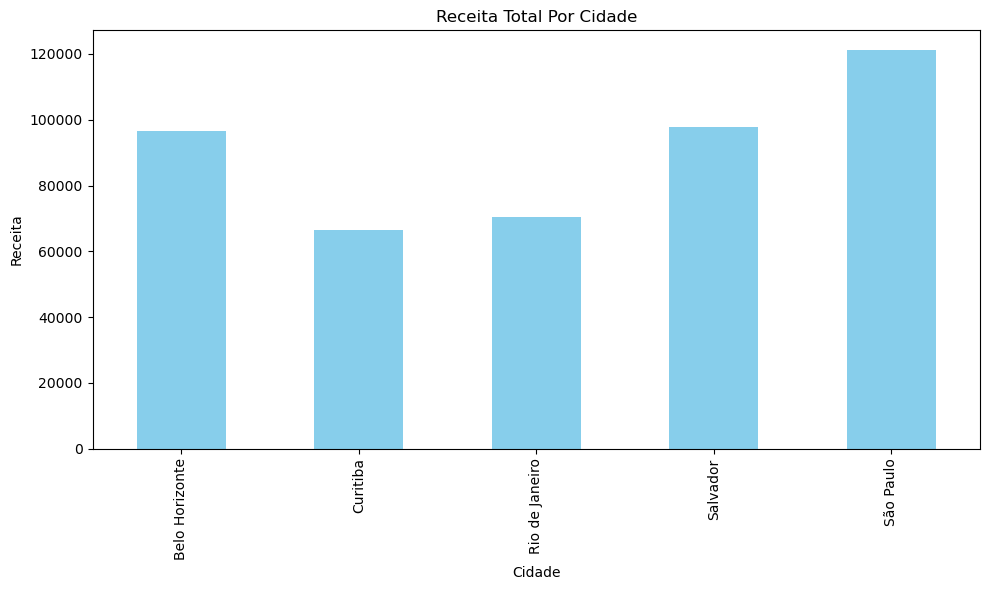

In [25]:
receita_cidade = data.groupby('cidade')['receita'].sum()
plt.figure(figsize=(10,6)) # tamanho do grafico
receita_cidade.plot(kind='bar', color='skyblue') # "bar" para definir grafico de barras
plt.title('Receita Total Por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Receita')
plt.tight_layout()  # Ajustar layout para não cortar os rótulos
plt.show()

- Crie um **gráfico de linhas** mostrando a **evolução da receita** ao longo do tempo.

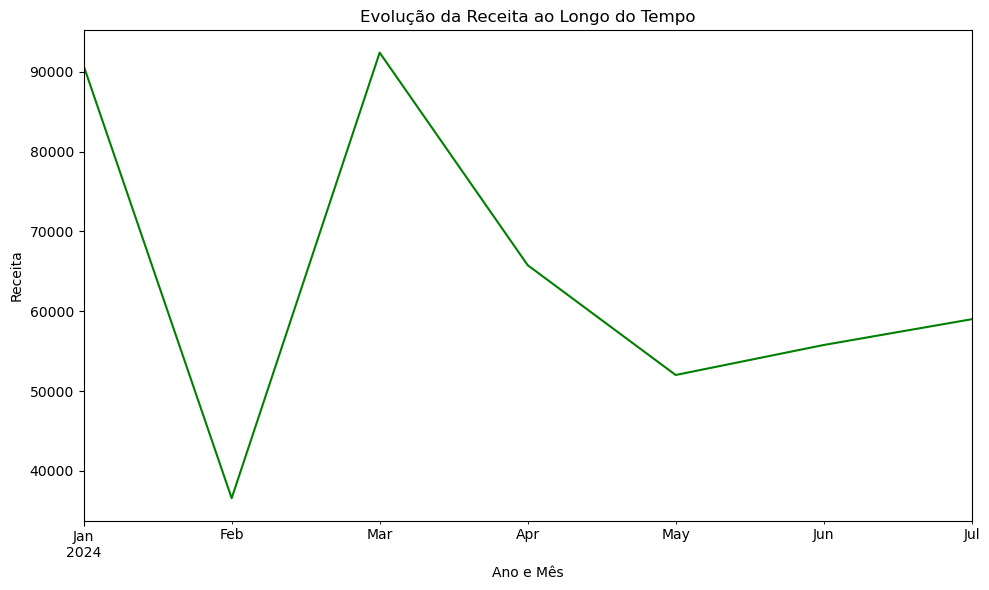

In [26]:
evol_receita = data.groupby('ano_mes')['receita'].sum()
evol_receita = evol_receita.sort_index(ascending=True)

plt.figure(figsize=(10, 6))
evol_receita.plot(kind='line', color='green')

plt.title('Evolução da Receita ao Longo do Tempo')
plt.xlabel("Ano e Mês")
plt.ylabel("Receita")
plt.tight_layout()
plt.show()

- Crie um **gráfico de pizza** mostrando a **participação de cada categoria** na receita total.

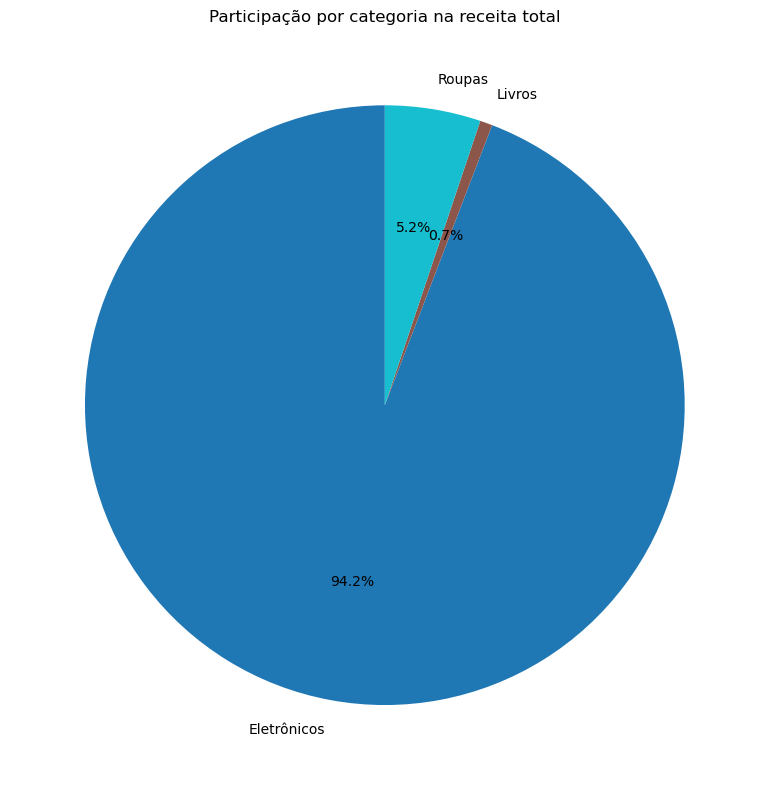

In [27]:
part_por_categoria = data.groupby('categoria')['receita'].sum()

plt.figure(figsize=(8, 8))
part_por_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab10')

plt.title("Participação por categoria na receita total")
plt.ylabel('') # Diferente dos demais gráficos, no de pizza não é necessário o eixo y.
plt.tight_layout()
plt.show()

## 6. Mini Dashboard interativo

In [28]:
receita_cidade = data.groupby('cidade')['receita'].sum().reset_index()

fig = px.bar(receita_cidade,
            x='cidade',
            y='receita',
            title="Receita Total por Cidade",
            labels={'cidade': 'Cidade', 'receita': 'Receita'},
            color='cidade')
fig.show()

# 7. Conclusão

Neste notebook, explorei várias técnicas de análise de dados com pandas, desde operações básicas até análises mais complexas. O uso de gráficos ajudou a visualizar e compreender melhor as tendências de vendas, clientes e produtos. O relatório final e o mini dashboard fornecem um resumo valioso dos insights obtidos durante a análise.

Esse trabalho serve como um ponto de partida sólido para análise de vendas e pode ser expandido com análises mais profundas conforme necessário.
